In [1]:
import numpy as np
import fitsio
from scipy.stats import gaussian_kde

import ultraplot as uplt

In [2]:
d = fitsio.read("/Users/beckermr/Desktop/input_cosmos_v4_montara_simcat_v7_seed42.fits")
print(d.shape)

(223007,)


In [ ]:
zvals = np.arange(0.01, 4.01, 0.05) + 0.05/2
print(zvals)

[0.035 0.085 0.135 0.185 0.235 0.285 0.335 0.385 0.435 0.485 0.535 0.585
 0.635 0.685 0.735 0.785 0.835 0.885 0.935 0.985 1.035 1.085 1.135 1.185
 1.235 1.285 1.335 1.385 1.435 1.485 1.535 1.585 1.635 1.685 1.735 1.785
 1.835 1.885 1.935 1.985 2.035 2.085 2.135 2.185 2.235 2.285 2.335 2.385
 2.435 2.485 2.535 2.585 2.635 2.685 2.735 2.785 2.835 2.885 2.935 2.985
 3.035 3.085 3.135 3.185 3.235 3.285 3.335 3.385 3.435 3.485 3.535 3.585
 3.635 3.685 3.735 3.785 3.835 3.885 3.935 3.985]


In [4]:
zbe = np.concatenate([zvals - 0.05 /2, [zvals[-1] + 0.05/2]])
print(zbe)

[0.01 0.06 0.11 0.16 0.21 0.26 0.31 0.36 0.41 0.46 0.51 0.56 0.61 0.66
 0.71 0.76 0.81 0.86 0.91 0.96 1.01 1.06 1.11 1.16 1.21 1.26 1.31 1.36
 1.41 1.46 1.51 1.56 1.61 1.66 1.71 1.76 1.81 1.86 1.91 1.96 2.01 2.06
 2.11 2.16 2.21 2.26 2.31 2.36 2.41 2.46 2.51 2.56 2.61 2.66 2.71 2.76
 2.81 2.86 2.91 2.96 3.01 3.06 3.11 3.16 3.21 3.26 3.31 3.36 3.41 3.46
 3.51 3.56 3.61 3.66 3.71 3.76 3.81 3.86 3.91 3.96 4.01]


In [9]:
eps = 1e-4
zp = np.clip(d["photoz"], 0.01+eps, 4.01-eps)

In [10]:
zp.min(), zp.max()

(0.0101, 4.0099)

In [11]:
np.mean(zp)

1.3215668835701653

<a list of 1 Line2D objects>

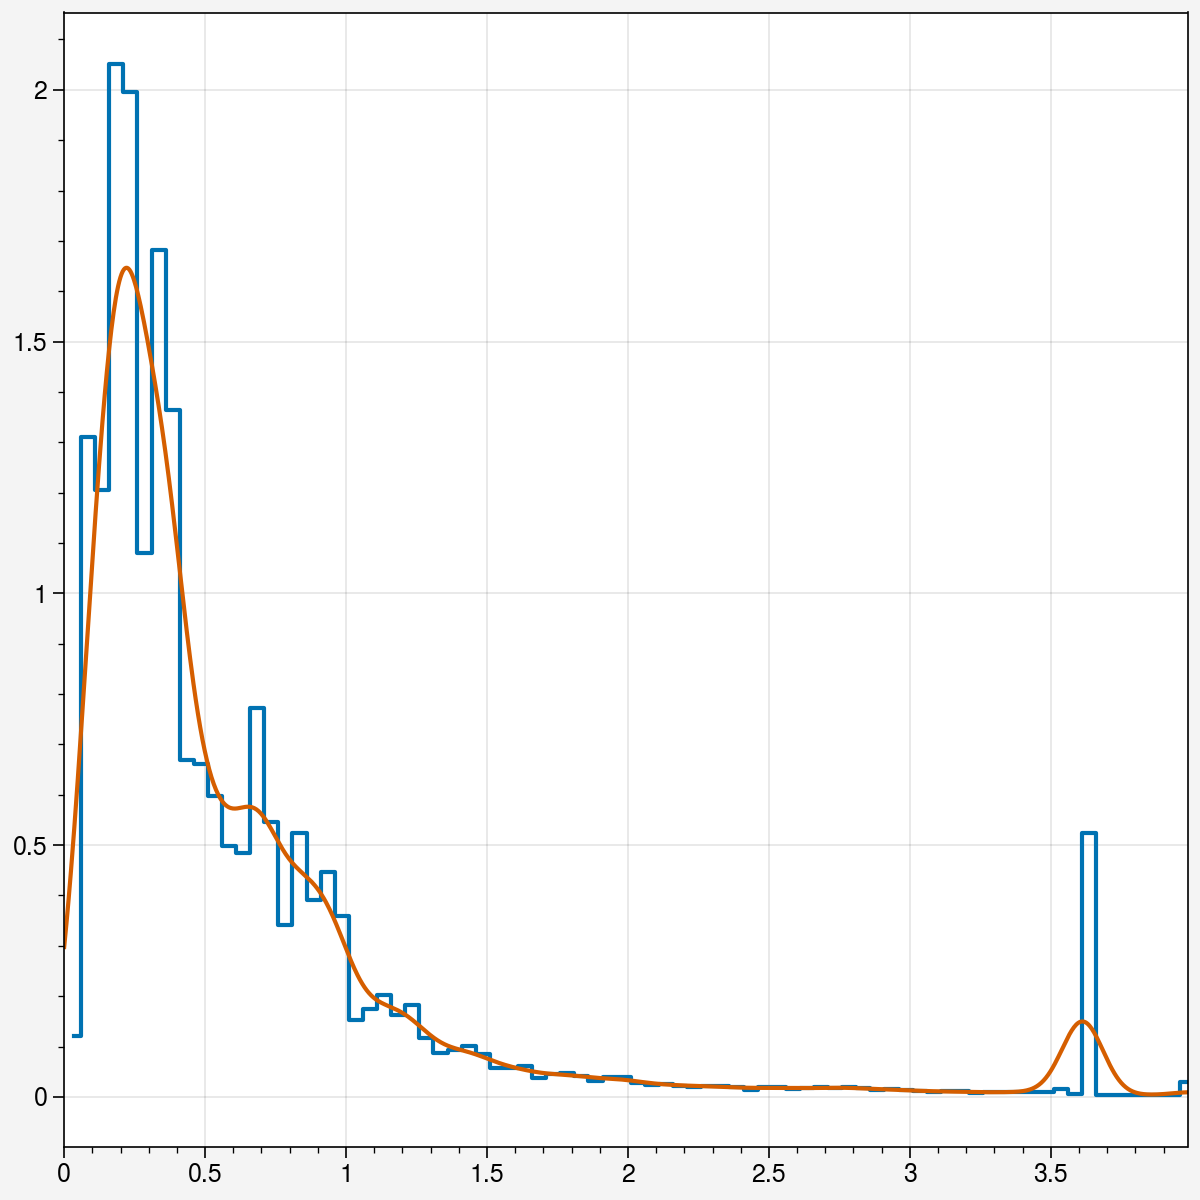

In [13]:
wgt = d["flux_r"] + d["flux_i"] + d["flux_z"]


kde = gaussian_kde(
    zp,
    weights=wgt,
    bw_method=0.1,
)

fig, axs = uplt.subplots(figsize=(6, 6))

ax = axs[0, 0]

h, be = np.histogram(
    zp,
    bins=zbe,
    density=False,
    weights=wgt,
)
assert np.allclose(np.sum(h), np.sum(wgt))

dx = zbe[1:] - zbe[:-1]
hp = h / dx
hp = hp / np.sum(hp * dx)
assert np.allclose(np.sum(hp * dx), 1.0)
assert hp.shape == zvals.shape

ax.plot(zvals, hp, drawstyle="steps-mid")

zv = np.linspace(0, zvals[-1], 1000)
kde_vals = kde.evaluate(zv)
ax.plot(zv, kde_vals)


In [ ]:
fitsio.write("gtemplate_hist_input_cosmos_v4_montara_simcat_v7_seed42.fits", h / np.sum(h), clobber=True)

In [14]:
hkde = kde.evaluate(zvals)
hkde = hkde / np.sum(hkde)
print(f"np.{repr(hkde)}")

np.array([0.0267978 , 0.04771043, 0.06783591, 0.08088843, 0.08331847,
       0.07791406, 0.06977548, 0.05927706, 0.04697653, 0.03691436,
       0.03124399, 0.02921629, 0.02922861, 0.02894708, 0.02700823,
       0.02454354, 0.02286044, 0.0214819 , 0.01930751, 0.01603413,
       0.01262013, 0.01036409, 0.00936232, 0.00871881, 0.00777421,
       0.00656203, 0.00552846, 0.00492145, 0.00451879, 0.00403703,
       0.00350145, 0.0030605 , 0.00272324, 0.00246635, 0.0023123 ,
       0.00220467, 0.002067  , 0.00193315, 0.00184168, 0.00173158,
       0.00155971, 0.00138213, 0.00125449, 0.00117071, 0.00111203,
       0.00106572, 0.00101297, 0.0009539 , 0.00091665, 0.00091018,
       0.00090625, 0.00089362, 0.00089426, 0.00091336, 0.00092634,
       0.00090787, 0.00085459, 0.00079051, 0.00073491, 0.00067841,
       0.00061723, 0.00057064, 0.00054269, 0.00051525, 0.00048735,
       0.00047453, 0.00048129, 0.00053498, 0.00084401, 0.00200914,
       0.00451926, 0.00712873, 0.00725519, 0.00469057, 0.00